# **Stroke Patient End-to-End Analysis**

The objective of this statistical analysis is to determine health factors that may impact the risk for stroke in order to better understand patient health and optimize healthcare.

Hypothesis: There is a signficant difference in average glucose levels and body mass index (BMI) between stroke patients and non-stroke patients.

Methods: descriptive statistics, two-tailed t-test, histogram, boxplot

# The Data
Data Source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

An initial examination of the raw data:


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Read in the GDrive-mounted CSV file
df = pd.read_csv('/content/gdrive/My Drive/Stroke Patients Capstone/healthcare-dataset-stroke-data.csv')

In [ ]:
df.shape

(5110, 12)

In [ ]:
# Examine rows, features, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Preview data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

Handle the nulls in the BMI column as this is one of the variables being tested in this analysis:



In [ ]:
# Print original size of DataFrame
print(df.size)

# Exclude records with missing values
df_filtered = df.dropna()

# Print size of modified DataFrame
print(df_filtered.size)

61320
58908


In [ ]:
# Examine modified DataFrame
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [ ]:
# How many stroke cases are there?
df_filtered['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

Create and examine a DataFrame containing data only for stroke patients:

In [ ]:
stroke_patients = df_filtered.iloc[(df_filtered['stroke'] == 1).values]
stroke_patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 248
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 209 non-null    int64  
 1   gender             209 non-null    object 
 2   age                209 non-null    float64
 3   hypertension       209 non-null    int64  
 4   heart_disease      209 non-null    int64  
 5   ever_married       209 non-null    object 
 6   work_type          209 non-null    object 
 7   Residence_type     209 non-null    object 
 8   avg_glucose_level  209 non-null    float64
 9   bmi                209 non-null    float64
 10  smoking_status     209 non-null    object 
 11  stroke             209 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 21.2+ KB


Create and examine a DataFrame for non-stroke patient data:

In [ ]:
non_stroke_patients = df_filtered.iloc[(df_filtered['stroke'] == 0).values]
non_stroke_patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4700 entries, 249 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4700 non-null   int64  
 1   gender             4700 non-null   object 
 2   age                4700 non-null   float64
 3   hypertension       4700 non-null   int64  
 4   heart_disease      4700 non-null   int64  
 5   ever_married       4700 non-null   object 
 6   work_type          4700 non-null   object 
 7   Residence_type     4700 non-null   object 
 8   avg_glucose_level  4700 non-null   float64
 9   bmi                4700 non-null   float64
 10  smoking_status     4700 non-null   object 
 11  stroke             4700 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 477.3+ KB


Set up a function calculating effect size to be used with t-tests later:

In [ ]:
# Define function to measure effect size with a 95% confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

# Average Glucose Level Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average Glucose Level')

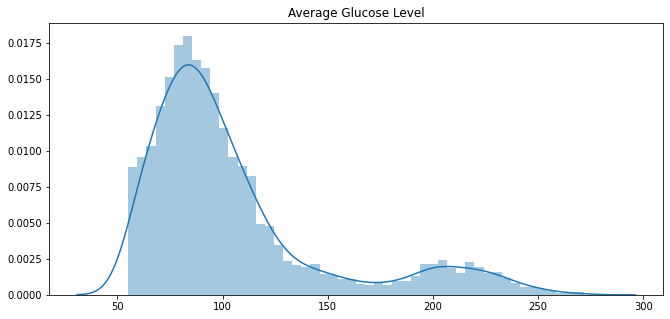

In [ ]:
# Check distribution of average glucose level
plt.figure(figsize = (11,5))
ax = sns.distplot(df_filtered['avg_glucose_level'])
plt.xlabel('')
plt.ylabel('')
plt.title('Average Glucose Level')

The histogram has an approximately normal distribution with a right skew.

In [ ]:
# Descriptive statistics for glucose across all patients
df_filtered[['avg_glucose_level']].describe()

,avg_glucose_level
count,4909.000000
mean,105.305150
std,44.424341
min,55.120000
25%,77.070000
50%,91.680000
75%,113.570000
max,271.740000


In [ ]:
# Descriptive statistics for glucose in stroke patients
stroke_patients[['avg_glucose_level']].describe()

,avg_glucose_level
count,209.000000
mean,134.571388
std,62.462047
min,56.110000
25%,80.430000
50%,106.580000
75%,196.920000
max,271.740000


In [ ]:
# Descriptive statistics for glucose in non-stroke patients
non_stroke_patients[['avg_glucose_level']].describe()

,avg_glucose_level
count,4700.000000
mean,104.003736
std,42.997798
min,55.120000
25%,76.887500
50%,91.210000
75%,112.432500
max,267.760000


Text(0.5, 1.0, 'Average Glucose Level')

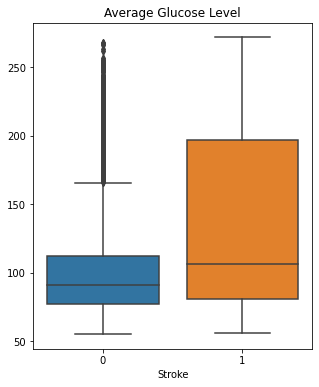

In [ ]:
# Box plot to check distribution of average glucose level in non-stroke patients (0) vs. stroke patients (1)
plt.figure(figsize = (5,6))
sns.boxplot(y="avg_glucose_level", x="stroke", data = df_filtered)
plt.xlabel('Stroke')
plt.ylabel('')
plt.title('Average Glucose Level')

Both box plots have a positive skew, while non-stroke patients have a stronger skew with many outliers. Stroke patients have a higher median and

**Average glucose level t-test:**

H₀: µ₁ - µ₂ = 0

Hₐ: µ₁ - µ₂ ≠ 0

*The null hypothesis is that there is no significant difference in average glucose level between stroke vs. non-stroke patients.*




In [ ]:
# Glucose t-test 
stats.ttest_ind(non_stroke_patients['avg_glucose_level'], stroke_patients['avg_glucose_level'])

Ttest_indResult(statistic=-9.827770450292483, pvalue=1.3799691107259876e-22)

*Reject the null hypothesis that there is no significant difference in average glucose level between stroke patients and non-stroke patients. The difference is significant at a p-value < .005.*

In [ ]:
# Glucose effect size
get_95_ci(non_stroke_patients['avg_glucose_level'],stroke_patients['avg_glucose_level'])

'The difference in means at the 95% confidence interval (two-tail) is between 22.01053673099891 and 39.124766048193194.'

In [ ]:
# Indicate means for bar chart heights
non_stroke_glucose_mean = non_stroke_patients[['avg_glucose_level']].mean()
print(non_stroke_glucose_mean)

stroke_glucose_mean = stroke_patients[['avg_glucose_level']].mean()
print(stroke_glucose_mean)

avg_glucose_level    104.003736
dtype: float64
avg_glucose_level    134.571388
dtype: float64


# BMI Analysis

In [ ]:
# Check distribution of BMI
plt.figure(figsize = (11,5))
ax = sns.distplot(df_filtered['bmi'])
plt.xlabel('')
plt.ylabel('')
plt.title('Body Mass Index (BMI)')

The histogram is normally distributed and skewed right.

In [ ]:
# Descriptive statistics for BMI aross all patients
df_filtered[['bmi']].describe()

In [ ]:
# Descriptive statistics for BMI in stroke patients
stroke_patients[['bmi']].describe()

In [ ]:
# Descriptive statistics for BMI in non-stroke patients
non_stroke_patients[['bmi']].describe()

In [ ]:
# Box plot to check distribution of BMI in non-stroke patients (0) vs. stroke patients (1)
plt.figure(figsize = (5,6))
sns.boxplot(y="bmi", x="stroke", data = df_filtered)
plt.xlabel('Stroke')
plt.ylabel('')
plt.title('Body Mass Index (BMI)')

Both box plots have a positive skew, while non-stroke patients have a stronger skew. Despite this, stroke patients appear to have higher BMI means than non-stroke patients.

**BMI t-test:**

H₀: µ₁ - µ₂ = 0

Hₐ: µ₁ - µ₂ ≠ 0

*The null hypothesis is that there is no significant difference in BMI between stroke vs. non-stroke patients.*

In [ ]:
# BMI t-test
stats.ttest_ind(non_stroke_patients['bmi'], stroke_patients['bmi'])

*Reject the null hypothesis that there is no significant difference in BMI between stroke patients and non-stroke patients. The difference is significant at a p-value < .005.*

In [ ]:
# BMI effect size
get_95_ci(non_stroke_patients['bmi'],stroke_patients['bmi'])

# Conclusion
The results of this analysis show that there is a statistically significant difference in glucose level or body mass index between patients who have had stroke vs. patients who have not had stroke.

On average, stroke patients tend to have higher average glucose levels and BMI. These are health factors that healthcare professionals should closely monitor in patients in order to detect individuals at risk for stroke and provide preventative healthcare optimized for minimizing that risk.